In [1]:
import pandas as pd

# Cargar el dataset desde dataF.csv
df = pd.read_csv('dataF.csv')

# Ver las primeras filas
print(df.head())

# Ver información general del dataset
print(df.info())


   id_marca          nombre  ano_creacion                        categoria  \
0         1  Palida studios          2019               Streetwear, Urbano   
1         2    Tony Delfino          2008       Casual, Urbano, Streetwear   
2         3            Wavy          2021               Streetwear, Urbano   
3         4         Egoista          2022  Streetwear, Urbano, Alternativo   
4         5        Laminero          2022                       Streetwear   

                        ciudad_base disponibilidad  precios_promedio  \
0  Nezahualcoyotl, Estado de México          Ambos             750.0   
1          Ciudad de México, Centro          Ambos            1100.0   
2                  Ciudad de México          Ambos             700.0   
3        Ecatepec, Estado de México          Ambos             600.0   
4                  Ciudad de México         Online             700.0   

   seguidores_ig  seguidores_tt  
0          12400           1914  
1         114000           187

In [3]:
# Estadísticas básicas de columnas numéricas
print(df.describe())

# Conteo de valores únicos en columnas categóricas
print("\nCategorías más comunes:")
print(df['categoria'].value_counts())

print("\nCiudades base más comunes:")
print(df['ciudad_base'].value_counts())

print("\nDisponibilidad de las marcas:")
print(df['disponibilidad'].value_counts())


         id_marca  ano_creacion  precios_promedio  seguidores_ig  \
count  118.000000    118.000000        118.000000     118.000000   
mean    59.500000   2020.152542       1656.304576   18128.983051   
std     34.207699      3.070753       1317.966001   39651.423787   
min      1.000000   2008.000000          0.000000     237.000000   
25%     30.250000   2019.000000        800.000000    2470.500000   
50%     59.500000   2021.000000       1000.000000    6666.000000   
75%     88.750000   2022.000000       2281.735000   15875.000000   
max    118.000000   2025.000000       6495.000000  355000.000000   

       seguidores_tt  
count     118.000000  
mean     8103.127119  
std     26329.530096  
min         0.000000  
25%        65.500000  
50%       484.000000  
75%      4187.750000  
max    178700.000000  

Categorías más comunes:
categoria
Streetwear                                     33
Slow Fashion                                   27
Jewelry                                      

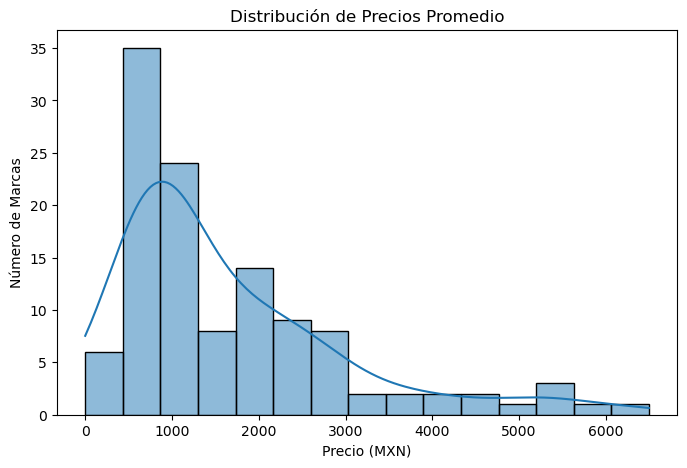

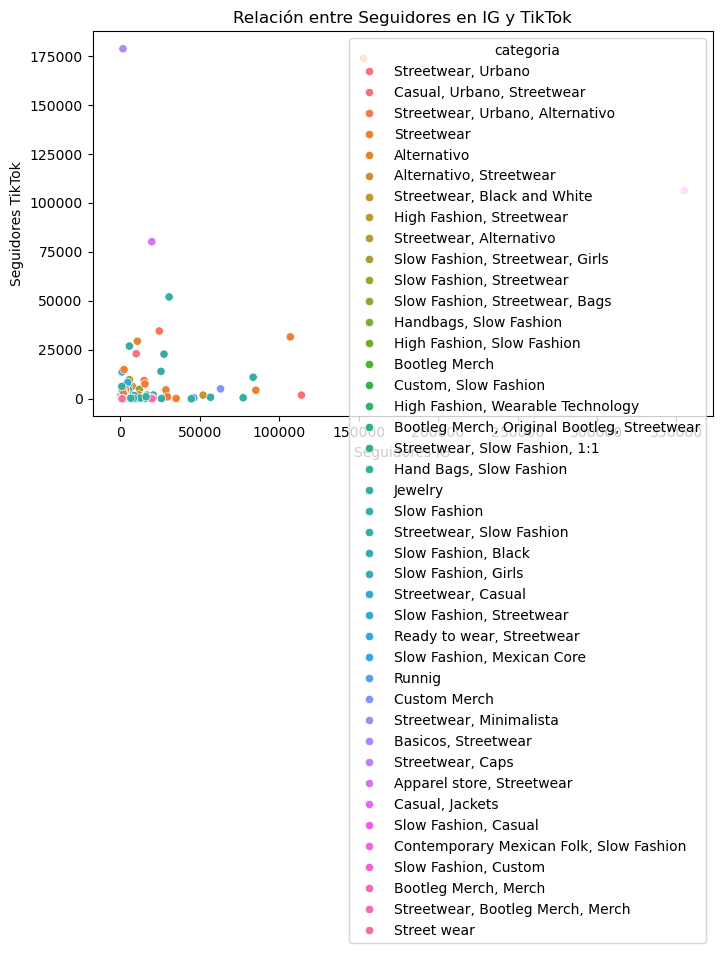

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de precios promedio
plt.figure(figsize=(8,5))
sns.histplot(df['precios_promedio'], bins=15, kde=True)
plt.title('Distribución de Precios Promedio')
plt.xlabel('Precio (MXN)')
plt.ylabel('Número de Marcas')
plt.show()

# Relación entre seguidores de IG y TT
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='seguidores_ig', y='seguidores_tt', hue='categoria')
plt.title('Relación entre Seguidores en IG y TikTok')
plt.xlabel('Seguidores IG')
plt.ylabel('Seguidores TikTok')
plt.show()


/var/folders/5j/_y0ygj096j5dn9mcsz4md2740000gn/T/ipykernel_47450/524851731.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ciudades.values, y=top_ciudades.index, palette='flare')


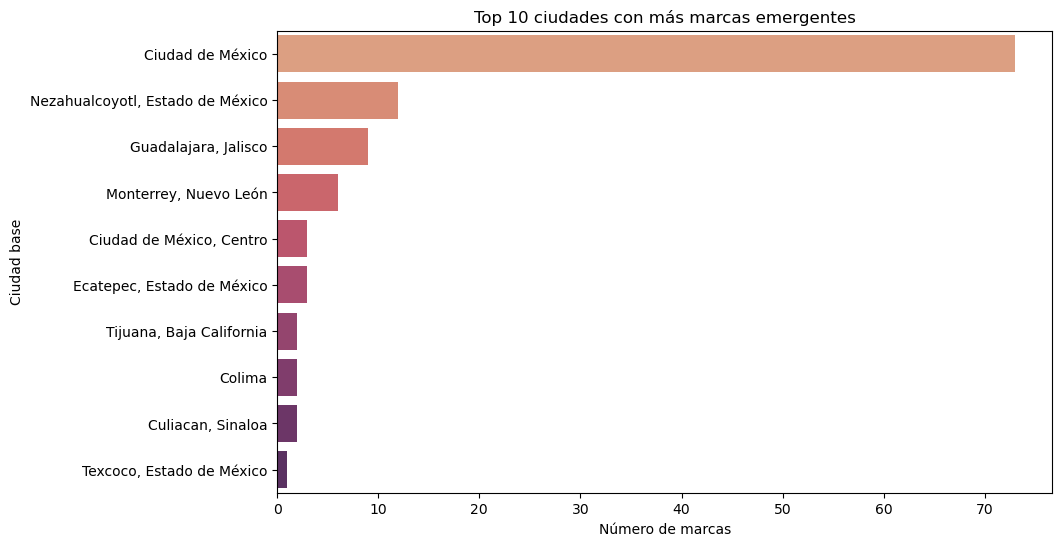

In [7]:
# Top 10 ciudades con más marcas
top_ciudades = df['ciudad_base'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_ciudades.values, y=top_ciudades.index, palette='flare')
plt.title('Top 10 ciudades con más marcas emergentes')
plt.xlabel('Número de marcas')
plt.ylabel('Ciudad base')
plt.show()


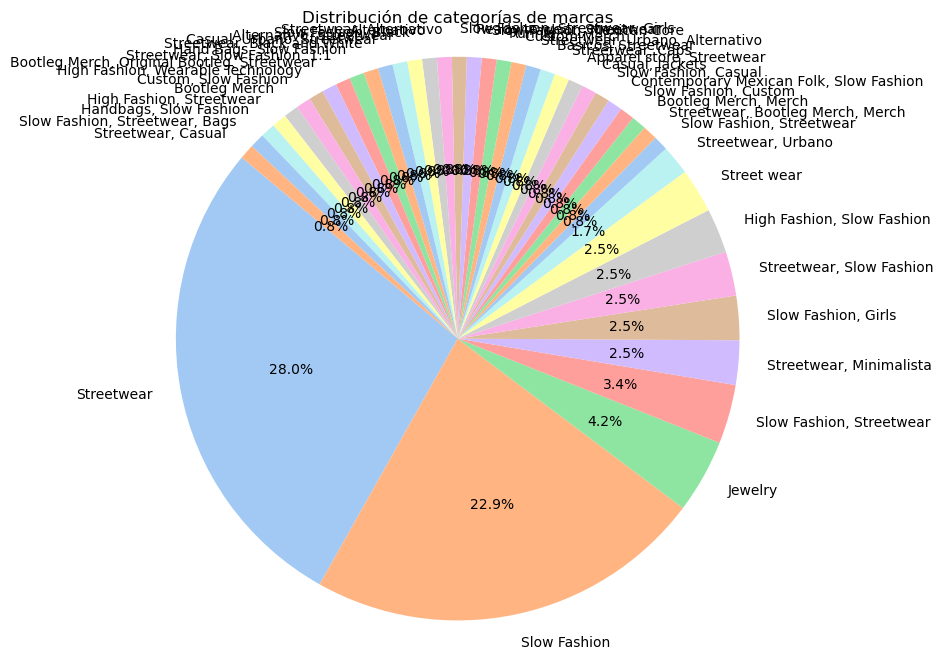

In [9]:
# Distribución de categorías
categoria_counts = df['categoria'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(categoria_counts, labels=categoria_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución de categorías de marcas')
plt.axis('equal')
plt.show()


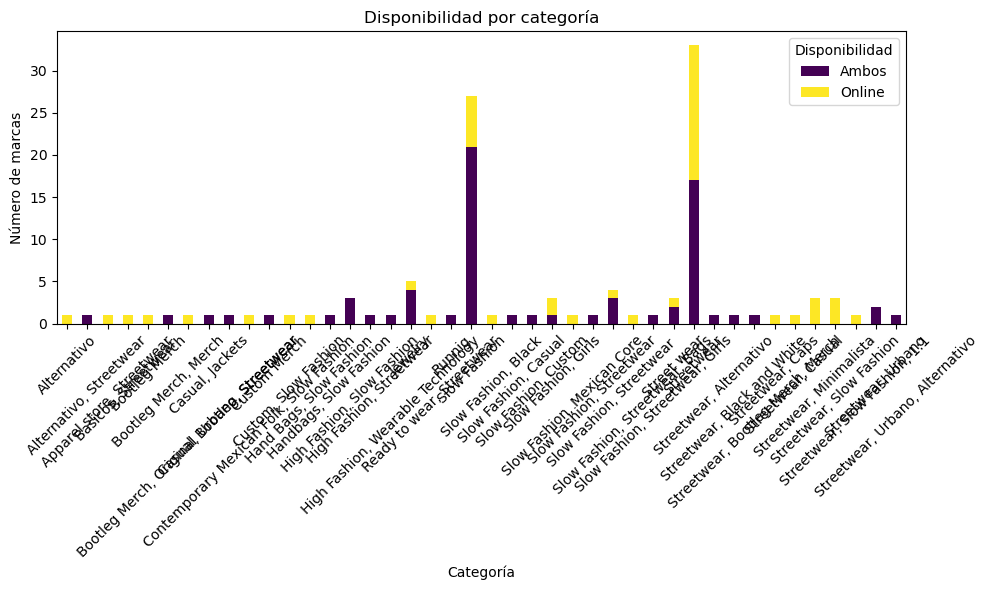

In [11]:
# Tabla cruzada de categoría y disponibilidad
dispo_categoria = pd.crosstab(df['categoria'], df['disponibilidad'])

dispo_categoria.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Disponibilidad por categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de marcas')
plt.legend(title='Disponibilidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


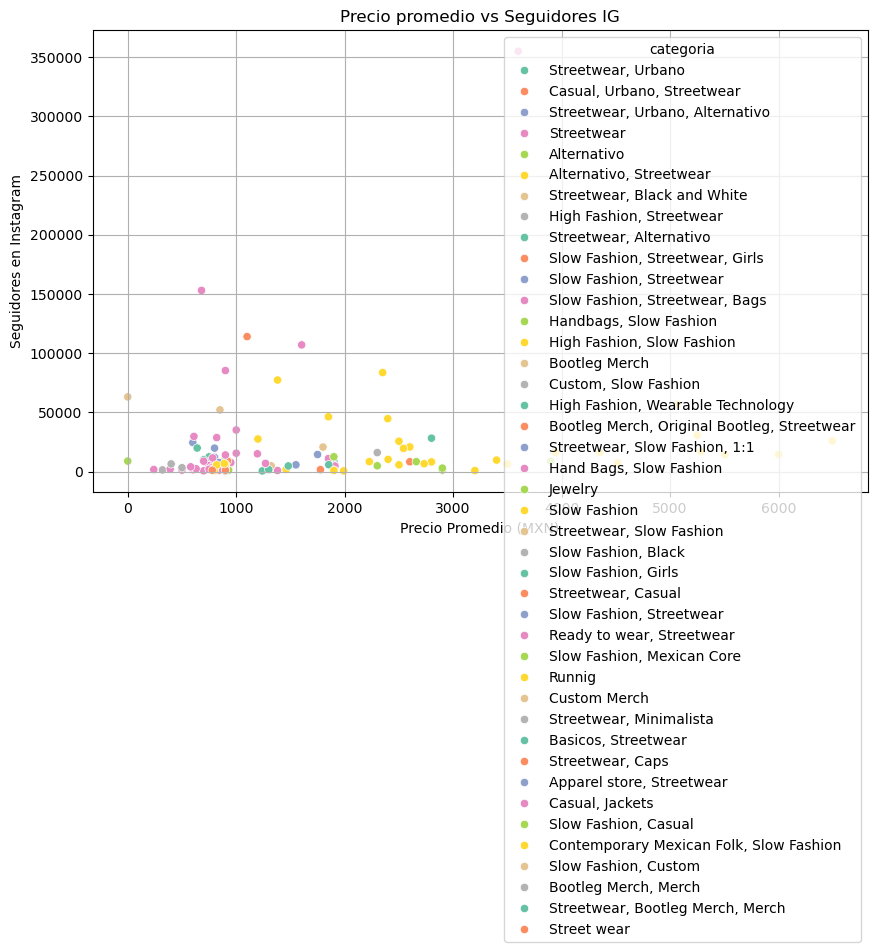

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='precios_promedio', y='seguidores_ig', hue='categoria', palette='Set2')
plt.title('Precio promedio vs Seguidores IG')
plt.xlabel('Precio Promedio (MXN)')
plt.ylabel('Seguidores en Instagram')
plt.grid(True)
plt.show()


/var/folders/5j/_y0ygj096j5dn9mcsz4md2740000gn/T/ipykernel_47450/1862585973.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ciudades.index, y=top_ciudades.values, palette="magma")


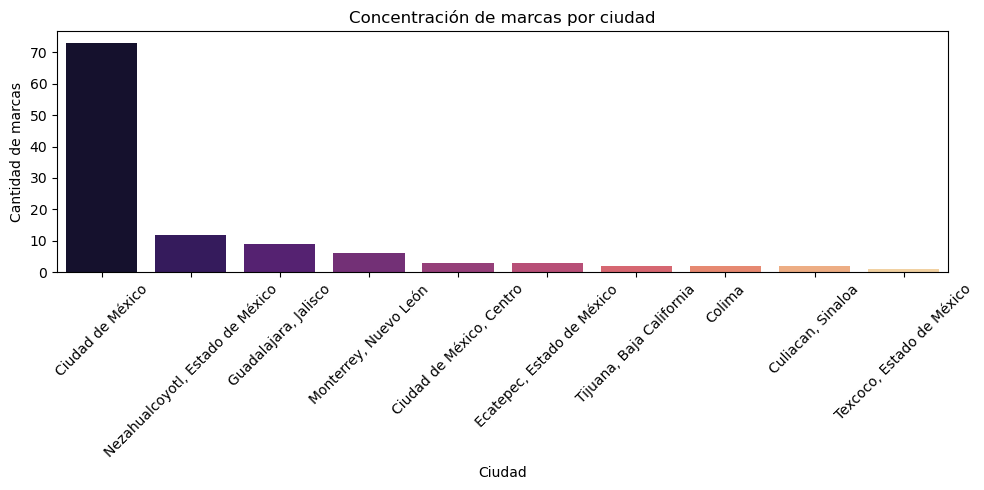

In [15]:
# Ya que no hay coordenadas, mostramos top ciudades
top_ciudades = df['ciudad_base'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_ciudades.index, y=top_ciudades.values, palette="magma")
plt.title('Concentración de marcas por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de marcas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


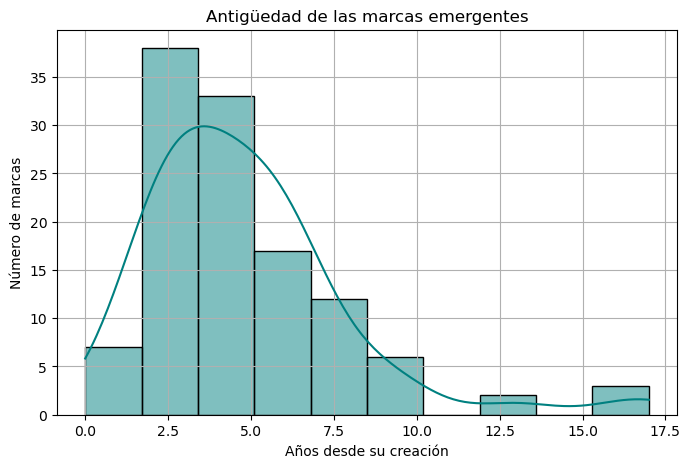

In [17]:
from datetime import datetime

df['antiguedad'] = datetime.now().year - df['ano_creacion']

plt.figure(figsize=(8,5))
sns.histplot(df['antiguedad'], bins=10, kde=True, color="teal")
plt.title('Antigüedad de las marcas emergentes')
plt.xlabel('Años desde su creación')
plt.ylabel('Número de marcas')
plt.grid(True)
plt.show()



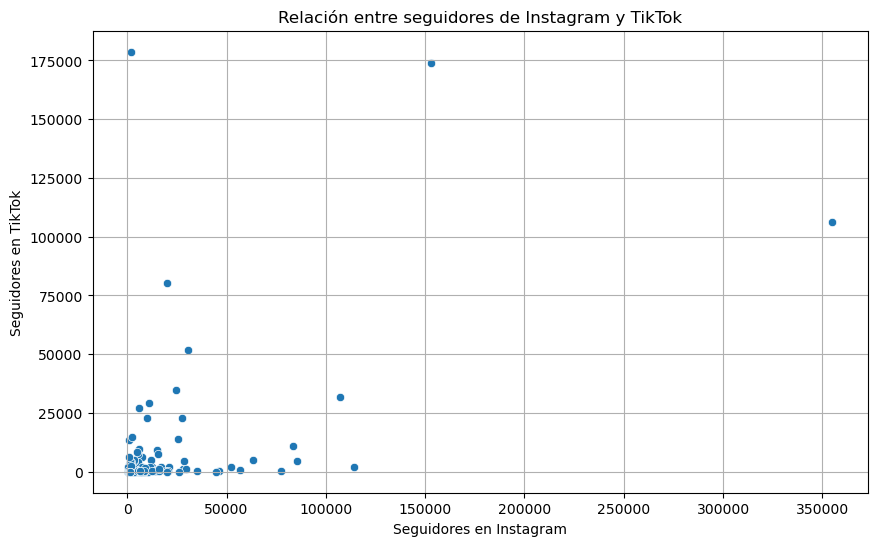

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='seguidores_ig', y='seguidores_tt')
plt.title('Relación entre seguidores de Instagram y TikTok')
plt.xlabel('Seguidores en Instagram')
plt.ylabel('Seguidores en TikTok')
plt.grid(True)
plt.show()


/var/folders/5j/_y0ygj096j5dn9mcsz4md2740000gn/T/ipykernel_47450/2233489230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_ciudades, x='ciudad_base', y='precios_promedio', palette='coolwarm')


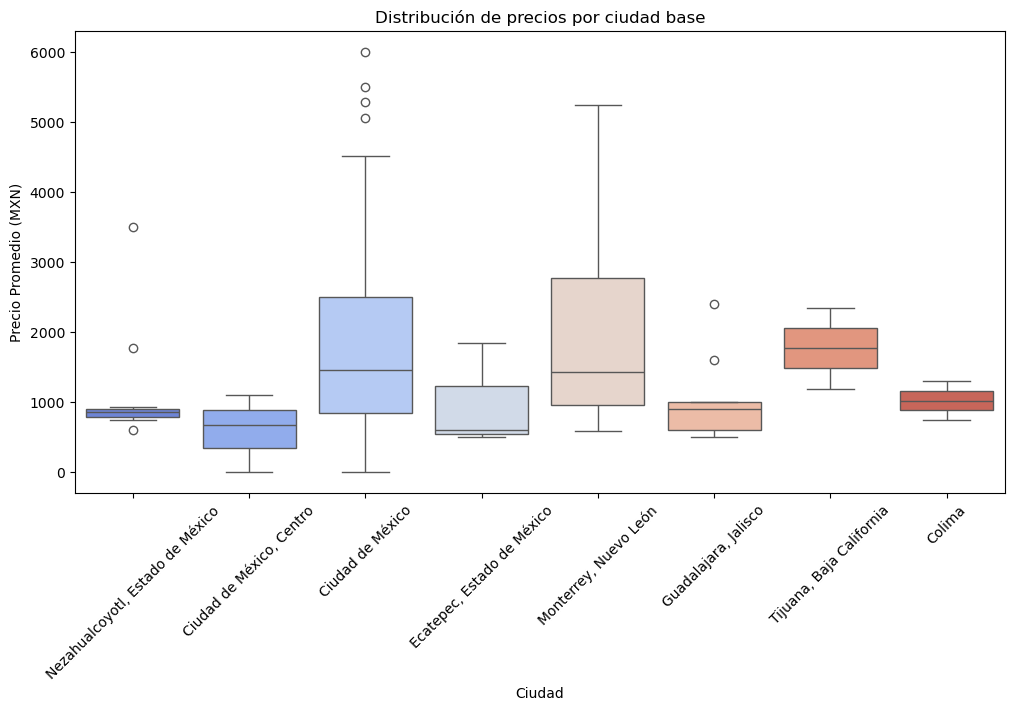

In [21]:
top_ciudades = df['ciudad_base'].value_counts().head(8).index
df_top_ciudades = df[df['ciudad_base'].isin(top_ciudades)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_ciudades, x='ciudad_base', y='precios_promedio', palette='coolwarm')
plt.title('Distribución de precios por ciudad base')
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio (MXN)')
plt.xticks(rotation=45)
plt.show()


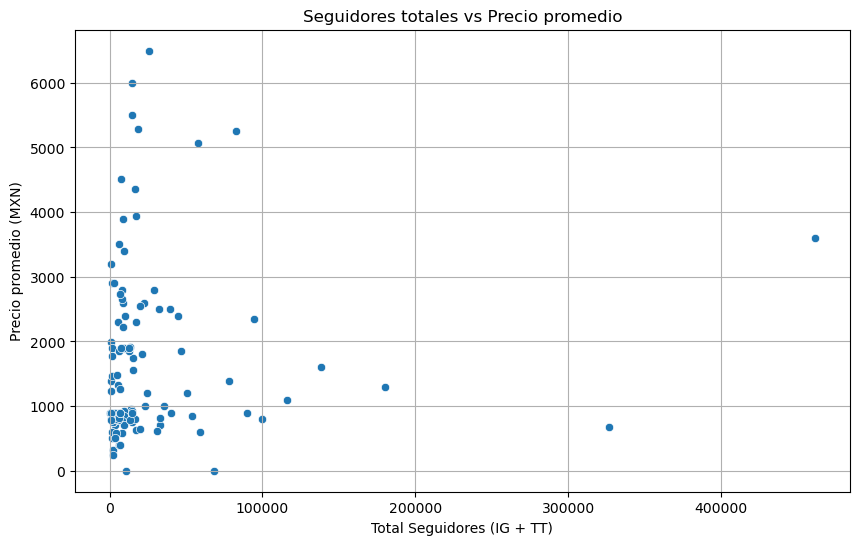

In [23]:
df['seguidores_totales'] = df['seguidores_ig'] + df['seguidores_tt']

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='seguidores_totales', y='precios_promedio')
plt.title('Seguidores totales vs Precio promedio')
plt.xlabel('Total Seguidores (IG + TT)')
plt.ylabel('Precio promedio (MXN)')
plt.grid(True)
plt.show()


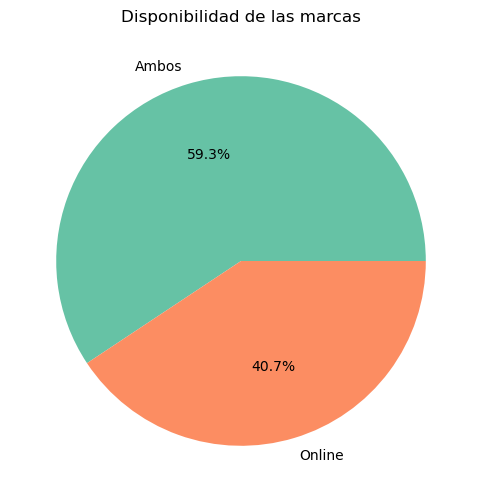

In [25]:
plt.figure(figsize=(6,6))
df['disponibilidad'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Disponibilidad de las marcas')
plt.ylabel('')
plt.show()


/var/folders/5j/_y0ygj096j5dn9mcsz4md2740000gn/T/ipykernel_47450/2172766987.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_ciudades, x='ciudad_base', y='seguidores_ig', palette='Spectral')


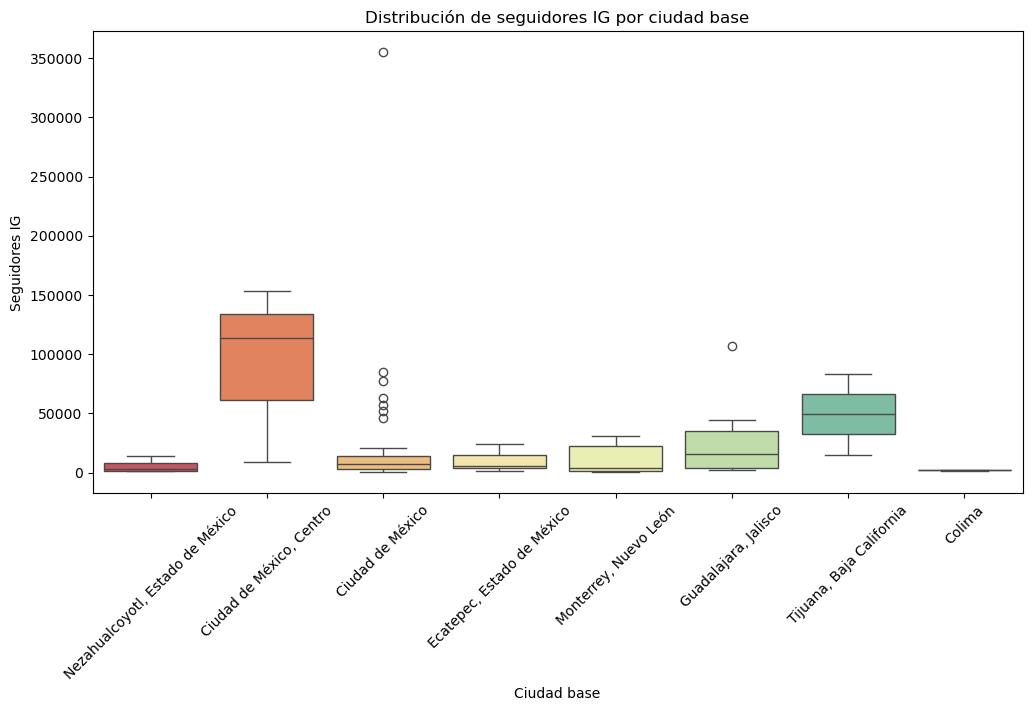

In [27]:
top_ciudades = df['ciudad_base'].value_counts().head(8).index
df_top_ciudades = df[df['ciudad_base'].isin(top_ciudades)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_ciudades, x='ciudad_base', y='seguidores_ig', palette='Spectral')
plt.title('Distribución de seguidores IG por ciudad base')
plt.xlabel('Ciudad base')
plt.ylabel('Seguidores IG')
plt.xticks(rotation=45)
plt.show()


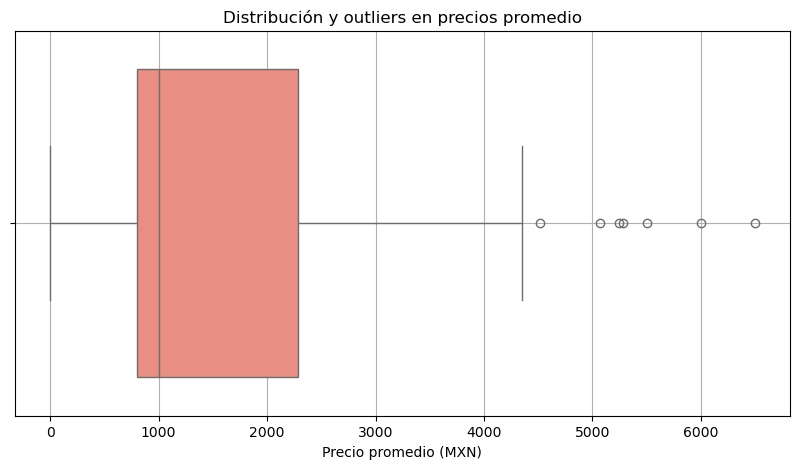

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['precios_promedio'], color='salmon')
plt.title('Distribución y outliers en precios promedio')
plt.xlabel('Precio promedio (MXN)')
plt.grid(True)
plt.show()


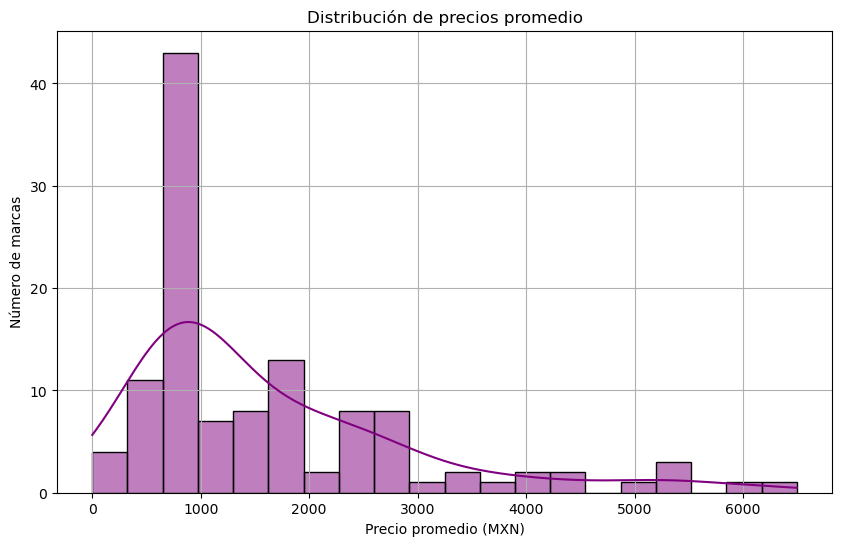

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['precios_promedio'], bins=20, kde=True, color='purple')
plt.title('Distribución de precios promedio')
plt.xlabel('Precio promedio (MXN)')
plt.ylabel('Número de marcas')
plt.grid(True)
plt.show()


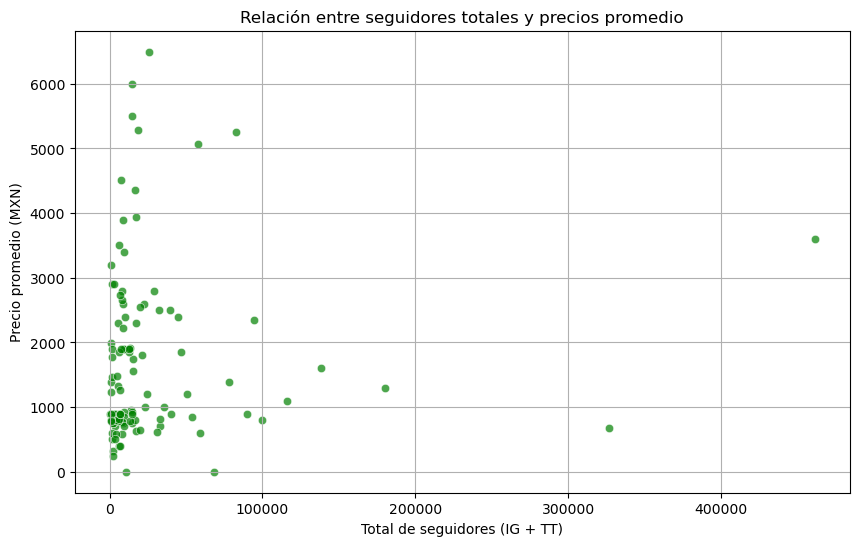

In [33]:
df['seguidores_totales'] = df['seguidores_ig'] + df['seguidores_tt']

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='seguidores_totales', y='precios_promedio', alpha=0.7, color='green')
plt.title('Relación entre seguidores totales y precios promedio')
plt.xlabel('Total de seguidores (IG + TT)')
plt.ylabel('Precio promedio (MXN)')
plt.grid(True)
plt.show()


In [35]:
# Cargar datos
import pandas as pd

df = pd.read_csv("dataF.csv")

# Crear columna de total de seguidores
df['seguidores_totales'] = df['seguidores_ig'] + df['seguidores_tt']

# Ordenar por menor precio y luego mayor número de seguidores
marca_destacada = df.sort_values(by=['precios_promedio', 'seguidores_totales'], ascending=[True, False]).iloc[0]

# Mostrar resultados
print("💡 Marca más popular con menor precio:")
print(f"- Marca: {marca_destacada['nombre']}")
print(f"- Precio promedio: ${marca_destacada['precios_promedio']:.2f} MXN")
print(f"- Seguidores en IG: {marca_destacada['seguidores_ig']}")
print(f"- Seguidores en TT: {marca_destacada['seguidores_tt']}")
print(f"- Total seguidores: {marca_destacada['seguidores_totales']}")
print(f"- Ciudad base: {marca_destacada['ciudad_base']}")
print(f"- Año de creación: {marca_destacada['ano_creacion']}")


💡 Marca más popular con menor precio:
- Marca: Mauro Garfias
- Precio promedio: $0.00 MXN
- Seguidores en IG: 63100
- Seguidores en TT: 5062
- Total seguidores: 68162
- Ciudad base: Ciudad de México
- Año de creación: 2008


In [37]:
import pandas as pd

# Cargar datos
df = pd.read_csv("dataF.csv")

# Calcular total de seguidores
df['seguidores_totales'] = df['seguidores_ig'] + df['seguidores_tt']

# Ordenar: primero por precio bajo, luego por popularidad alta
top10_populares_baratas = df.sort_values(by=['precios_promedio', 'seguidores_totales'], ascending=[True, False]).head(10)

# Mostrar tabla
print("🧵 Top 10 marcas más populares con menores precios promedio:")
print(top10_populares_baratas[['nombre', 'precios_promedio', 'seguidores_ig', 'seguidores_tt', 'seguidores_totales', 'ciudad_base']])


🧵 Top 10 marcas más populares con menores precios promedio:
            nombre  precios_promedio  seguidores_ig  seguidores_tt  \
56   Mauro Garfias               0.0          63100           5062   
89   Coloso de Oro               0.0           8841           1627   
81     SEEDI BRAND             240.0           1732            266   
65          SKILLZ             320.0           1394            477   
68     Hooney Well             391.0           2016           4256   
103        Bopshit             400.0           6458             19   
88             DOA             500.0           3258             60   
16          SIXTUS             500.0           1225            160   
66        No Mercy             580.0           3992              0   
54          LOWDEF             590.0           3247           4587   

     seguidores_totales                 ciudad_base  
56                68162            Ciudad de México  
89                10468    Ciudad de México, Centro  
81     

/var/folders/5j/_y0ygj096j5dn9mcsz4md2740000gn/T/ipykernel_47450/264290458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


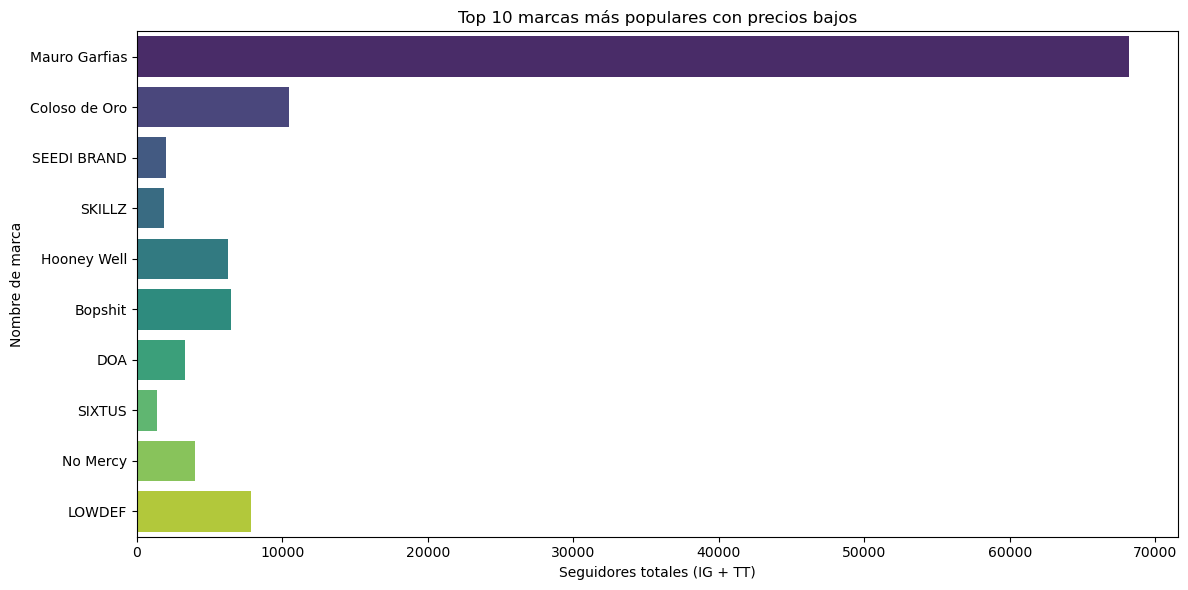

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=top10_populares_baratas,
    x='seguidores_totales',
    y='nombre',
    palette='viridis'
)
plt.title('Top 10 marcas más populares con precios bajos')
plt.xlabel('Seguidores totales (IG + TT)')
plt.ylabel('Nombre de marca')
plt.tight_layout()
plt.show()
